In [1]:
import pandas as pd
import numpy as np 

In [5]:
airbnb = pd.read_csv('data/airbnb-seattle-listings.csv')

/Users/ally/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
airbnb.shape[0] #columns

9040

In [17]:
print(list(airbnb.columns)) #variable names

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

2a) Summary, Space, Description, bathrooms, bedrooms, square_feet, amenities 

In [25]:
pd.DataFrame.duplicated(airbnb).sum() 
#there are no duplicate columns

0

In [36]:
type(airbnb['price'][0])

str

In [39]:
type(airbnb['square_feet'][0])

numpy.float64

In [40]:
type(airbnb['bedrooms'][0])

numpy.float64

In [42]:
type(airbnb['accommodates'][0])

numpy.int64

In [43]:
airbnb['price'].isnull().sum()

0

In [46]:
airbnb['square_feet'].isnull().sum()

8633

In [44]:
airbnb['bedrooms'].isnull().sum()

1

In [45]:
airbnb['accommodates'].isnull().sum()

0

square feet is going to be a lot less helpful that previously thought since there are only 500 entries of 9040

In [72]:
numeric = []
for row in airbnb['price']:
    row = row[1:].replace(",", "")
    row = float(row)
    numeric.append(row)

In [74]:
prices = pd.DataFrame(columns =['oringial', 'numeric'])
prices['oringial'] = airbnb['price']
prices['numeric'] = numeric
prices

,oringial,numeric
0,$296.00,296.0
1,$48.00,48.0
2,$90.00,90.0
3,$62.00,62.0
4,$99.00,99.0
...,...,...
9035,$137.00,137.0
9036,$35.00,35.0
9037,$35.00,35.0
9038,$120.00,120.0


In [83]:
price_mean = prices['numeric'].mean()
print('price:' + str(price_mean))
sf_mean = airbnb['square_feet'].mean()
print('sq. ft:'+ str(sf_mean))
bed_mean = airbnb['bedrooms'].mean()
print('bedrooms:' +str(bed_mean))
acc_mean = airbnb['accommodates'].mean()
print('accommodates:' + str(acc_mean))

price:169.1112831858407
sq. ft:696.980343980344
bedrooms:1.3724969576280561
accommodates:3.6511061946902656


In [84]:
price = prices['numeric'].min()
print('price:' + str(price))
sf = airbnb['square_feet'].min()
print('sq. ft:'+ str(sf))
bed = airbnb['bedrooms'].min()
print('bedrooms:' +str(bed))
acc = airbnb['accommodates'].min()
print('accommodates:' + str(acc))

price:0.0
sq. ft:0.0
bedrooms:0.0
accommodates:1


In [85]:
price = prices['numeric'].max()
print('price:' + str(price))
sf = airbnb['square_feet'].max()
print('sq. ft:'+ str(sf))
bed = airbnb['bedrooms'].max()
print('bedrooms:' +str(bed))
acc = airbnb['accommodates'].max()
print('accommodates:' + str(acc))

price:5400.0
sq. ft:2750.0
bedrooms:8.0
accommodates:28


In [86]:
price = prices['numeric'].median()
print('price:' + str(price))
sf = airbnb['square_feet'].median()
print('sq. ft:'+ str(sf))
bed = airbnb['bedrooms'].median()
print('bedrooms:' +str(bed))
acc = airbnb['accommodates'].median()
print('accommodates:' + str(acc))

price:120.0
sq. ft:600.0
bedrooms:1.0
accommodates:3.0


In [101]:
airbnb['numeric'] = prices['numeric']
means = airbnb.groupby('bedrooms')['numeric'].mean()
means

bedrooms
0.0     138.720513
1.0     137.566427
2.0     196.175399
3.0     253.063361
4.0     331.437956
5.0     496.566265
6.0     526.157895
7.0     570.636364
8.0    1150.000000
Name: numeric, dtype: float64

As the bedroom number increases so does the mean price

In [93]:
import matplotlib.pyplot as plt

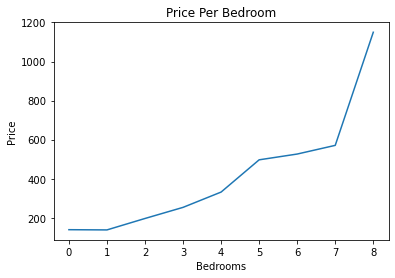

In [107]:
plt.plot(means)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price Per Bedroom")
plt.show()

In [117]:
airbnb[airbnb.numeric == 0.0].count()

id                                              2
listing_url                                     2
scrape_id                                       2
last_scraped                                    2
name                                            2
                                               ..
calculated_host_listings_count_entire_homes     2
calculated_host_listings_count_private_rooms    2
calculated_host_listings_count_shared_rooms     2
reviews_per_month                               2
numeric                                         2
Length: 107, dtype: int64

In [119]:
airbnb[airbnb.bedrooms == 0.0].count()

id                                              1170
listing_url                                     1170
scrape_id                                       1170
last_scraped                                    1170
name                                            1170
                                                ... 
calculated_host_listings_count_entire_homes     1170
calculated_host_listings_count_private_rooms    1170
calculated_host_listings_count_shared_rooms     1170
reviews_per_month                                985
numeric                                         1170
Length: 107, dtype: int64

Zero bedrooms could mean a studio appartments